<a href="https://colab.research.google.com/github/durjoy172/stroke-prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing llibraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set3")

# **Reading from dataset**


In [ ]:
dataset = pd.read_csv('healthcare-dataset-stroke-data.csv')
dataset= dataset.drop(['id'], axis= 1) #remove unnecesarry columns
dataset.drop_duplicates(inplace=True) # remove duplicates
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


(5110, 11)

# Data Preprocessing

# **Checking For Null Values**

* isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False

* The sum() function returns a number, the sum of all items in an iterable.

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*creating  groups in terms of age range in toddler, teen, adult & senior and add that column to the dataset*

# Imputing the null values of BMI.
After applying impute the null values will replace with hard coded values in terms of the range

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy= 'median')
imputer.fit(dataset[['bmi'] ])
dataset[['bmi']]= imputer.transform(dataset[['bmi']])

# After imputing there will not be in null value

Now with isnull function and sum function we can observe that.

In [ ]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Shape return how many rows and columns are in the dataset.**
*Here, Rows -> 5110 & Columns -> 11*


In [ ]:
dataset.shape

(5110, 11)

# **The describe() method returns description of the data in the DataFrame**.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

In [ ]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Check if there are any duplicate values present or not
will use duplicated() function with sum() function for counting

In [ ]:
dataset.duplicated().sum()

0

# Categorical and continous columns
into separte lists for future purspose

In [ ]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in dataset.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

transforming the categorical gender and ever married features into numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.gender= le.fit_transform(dataset.gender.values)
dataset.ever_married= le.fit_transform(dataset.ever_married.values)

In [ ]:
x= dataset.iloc[:, : -1].values#feature data
y= dataset.iloc[:, -1: ].values#label data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[5,6,9])] , remainder='passthrough' )
x= np.array(ct.fit_transform(x))


Train data 70% , Test data 30%

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=3)
KNNClassifier.fit(x_train, y_train)

y_pred_KNN = KNNClassifier.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
ans1=KNNClassifier.score(x_test, y_test)*100
print(ans1)


93.73776908023484


In [ ]:
from sklearn.linear_model import LogisticRegression
lrClassifier = LogisticRegression(max_iter=10000)
lrClassifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [ ]:
ans2=lrClassifier.score(x_test, y_test)*100
print(ans2)

95.04240052185257


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
ans3=dtClassifier.score(x_test, y_test)*100
print(ans3)

91.58512720156556


In [ ]:
accuracy_scores=[ans1,ans2,ans3]

# Visualizing Count of Categorical Columns

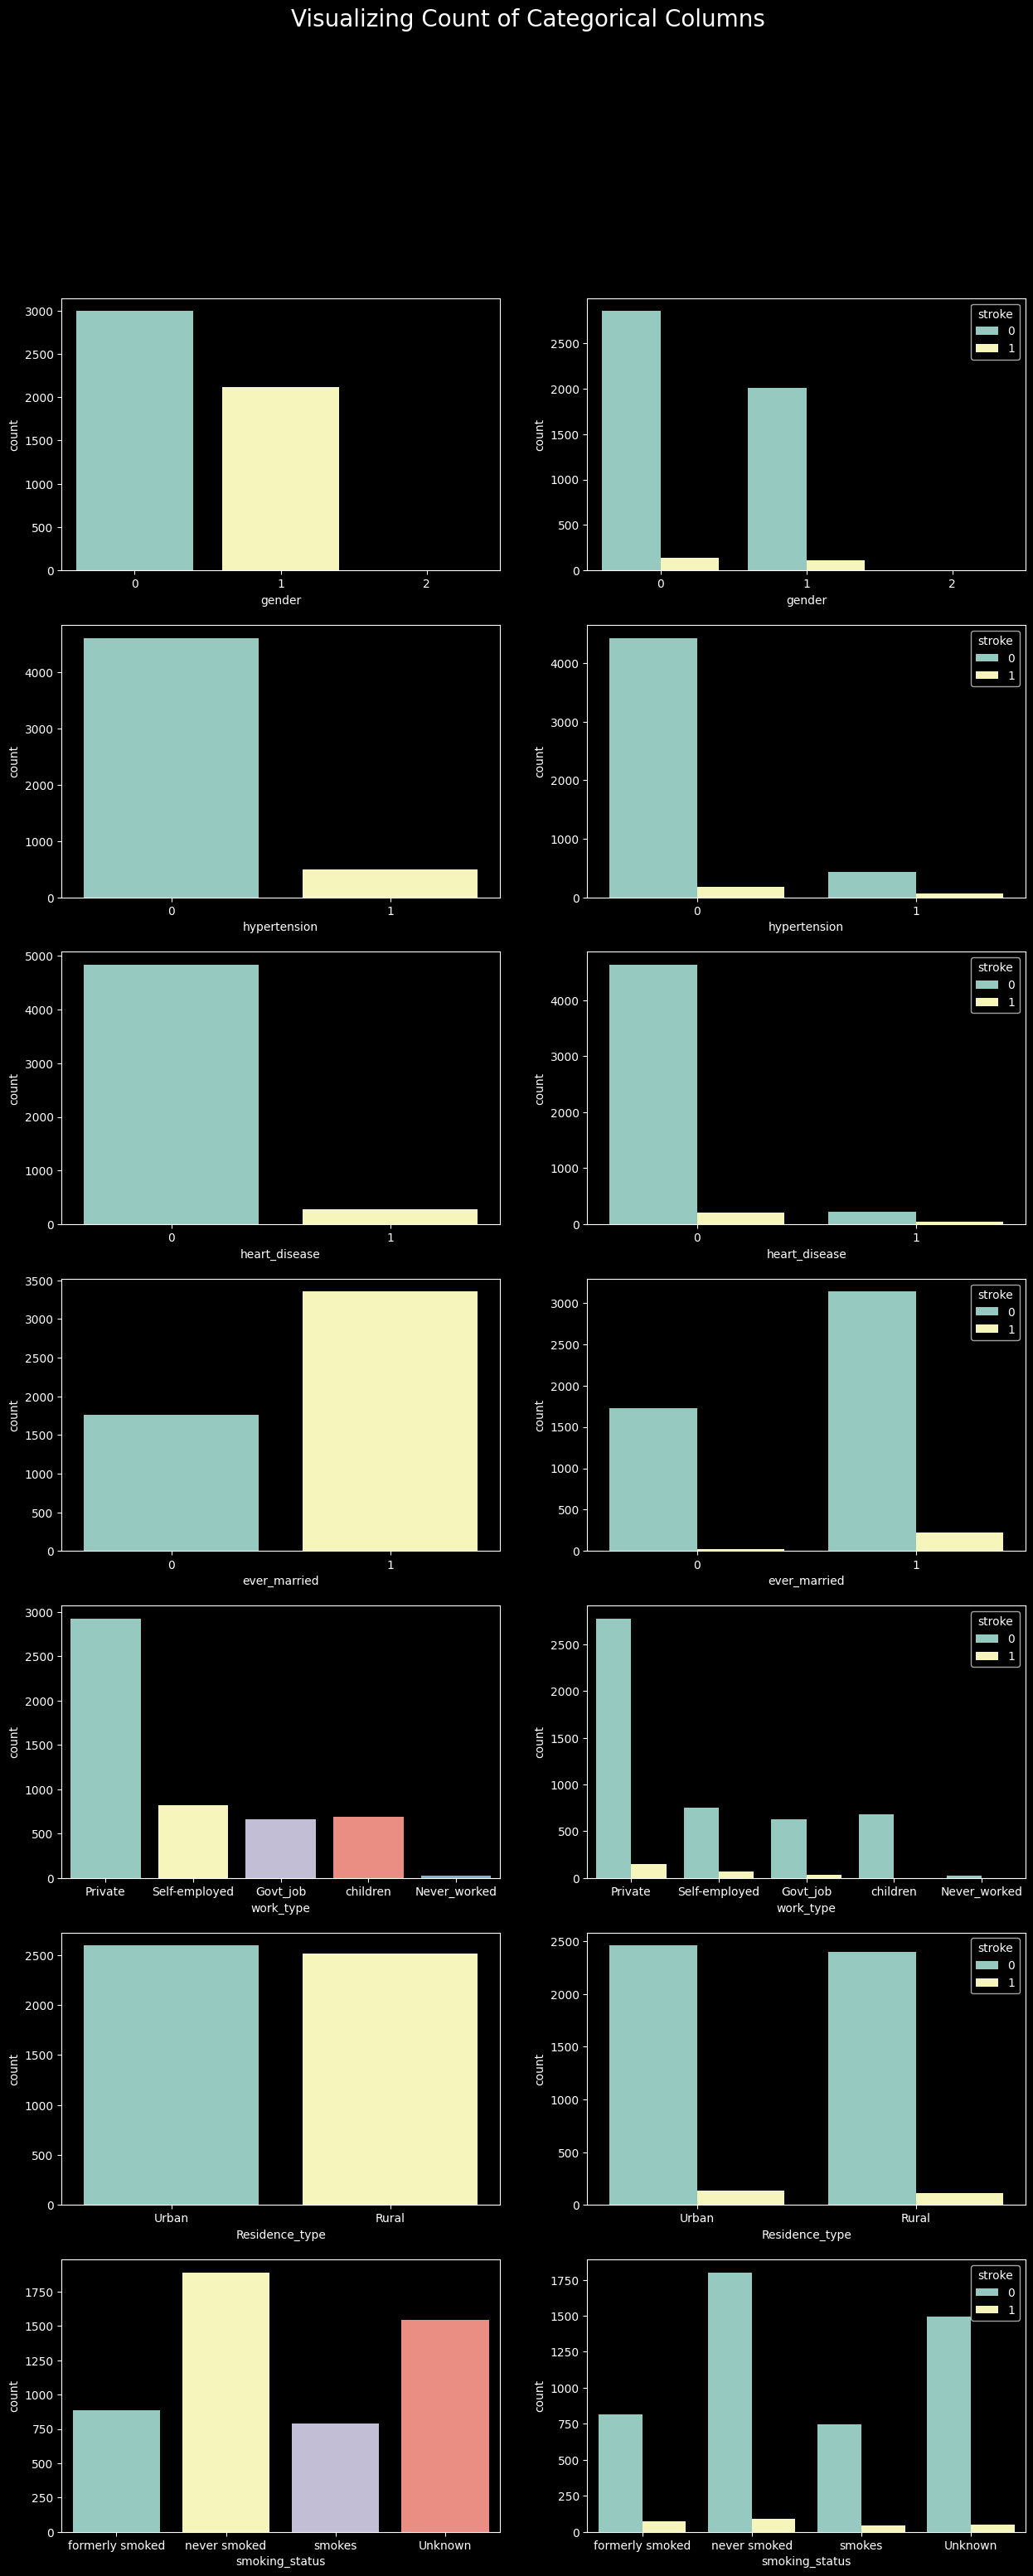

In [ ]:
fig,ax=plt.subplots(7,2,figsize=(15,35))
for index, i in enumerate(cat_cols):
    plt.suptitle("Visualizing Count of Categorical Columns", size=20)
    sns.countplot(data=dataset,x=i,ax=ax[index,0])
    sns.countplot(data=dataset,x=i,ax=ax[index,1],hue='stroke')

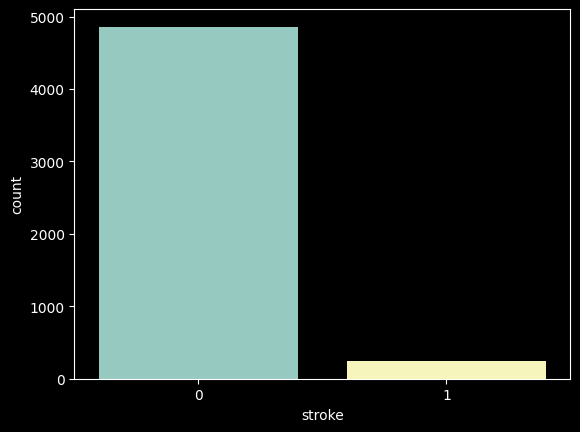

In [ ]:
sns.countplot(data=dataset,x='stroke')
plt.show()

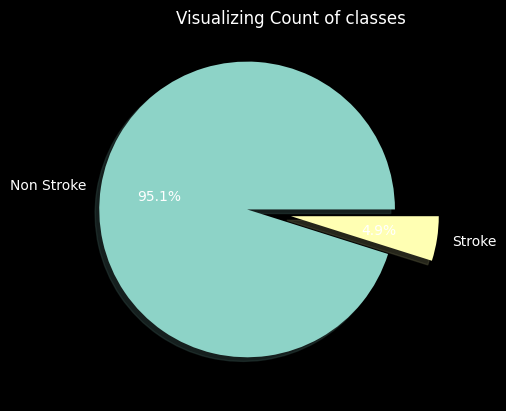

In [ ]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(dataset['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

# Visualizing Distribution of Continous Columns

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index, i in enumerate(con_cols):
    plt.suptitle("Visulalizing Distribution of Continous Columns", size=20)
    sns.histplot(dataset[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=dataset,x=i,ax=ax[index,1])
    sns.violinplot(data=dataset,x=i,ax=ax[index,2])

In [ ]:
sns.pairplot(data=dataset, hue='stroke')

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(dataset.corr(),annot=True, linewidth=0.5, fmt='0.2f')
plt.show()

In [ ]:
print(accuracy_scores)

In [ ]:

model_names = ['KNN', 'Logistic Regression', 'DecisionTreeClassifier']
new_acc=[]
for i in accuracy_scores:
  new_acc.append(i/100)

plt.figure(figsize=(15, 6))
plt.bar(model_names, new_acc, color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy of Different Models')
plt.ylim(0.0, 1.0)  # Set y-axis limits between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score


y_true = y_test
y_pred_knn = KNNClassifier.predict(x_test)
y_pred_lr = lrClassifier.predict(x_test)
y_pred_dt = dtClassifier.predict(x_test)

precision_knn = precision_score(y_true, y_pred_knn)
recall_knn = recall_score(y_true, y_pred_knn)

precision_lr = precision_score(y_true, y_pred_lr)
recall_lr = recall_score(y_true, y_pred_lr)
dtClassifier
precision_dt = precision_score(y_true, y_pred_dt)
recall_dt = recall_score(y_true, y_pred_dt)


print(f'KNN Precision: {precision_knn:.2f}')
print(f'KNN Recall: {recall_knn:.2f}')

print(f'Logistic Regression Precision: {precision_lr:.2f}')
print(f'Logistic Regression Recall: {recall_lr:.2f}')

print(f'DecisionTreeClassifier Precision: {precision_dt:.2f}')
print(f'DecisionTreeClassifier Recall: {recall_dt:.2f}')

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred_knn = KNNClassifier.predict(x_test)
y_pred_lr = lrClassifier.predict(x_test)
y_pred_dt = dtClassifier.predict(x_test)


conf_matrix_knn = confusion_matrix(y_true, y_pred_knn)
conf_matrix_lr = confusion_matrix(y_true, y_pred_lr)
conf_matrix_dt = confusion_matrix(y_true, y_pred_dt)

print('Confusion Matrix for KNN:')
print(conf_matrix_knn)

print('Confusion Matrix for Logistic Regression:')
print(conf_matrix_lr)

print('Confusion Matrix for DecisionTreeClassifier:')
print(conf_matrix_dt)
